In [52]:
import pandas as pd
import numpy as np

#Read the file
df = pd.read_csv('/content/trip_data.csv')

##**1. CHECKING DATA QUALITY**
## Data preprocessing

In [53]:
df.head()

,source,target,weight,RideID,DriverID,CustomerID,VehicleID,StartLocation,EndLocation,StartTime,...,Cost,TripDuration.1,TimeOfDay,WeatherCondition,DayOfWeek,TrafficCondition,PickupLocation,DropoffLocation,UserAgeGroup,HistoricalTripCount
0,0,1,5.301416,SIL355,HGNICL,B1K4KA,SML5BM,"1.255784, 79.982622","87.856236, -57.204379",12/6/2023 11:34,...,36.87,5,Morning,Rainy,Monday,Heavy,58,17,18-25,23
1,0,2,7.725468,K7BMJK,KIGW8K,B56GQR,52O34Q,"51.901785, -67.117126","-79.979811, 158.730928",12/6/2023 4:53,...,43.18,109,Evening,Rainy,Wednesday,Light,92,63,26-35,4
2,0,3,1.159829,SZ2OTE,QZTWSD,G380VG,5CVCE3,"72.383572, -132.208995","-41.586461, -151.989578",12/6/2023 5:59,...,59.09,39,Afternoon,Cloudy,Tuesday,Moderate,33,9,36-45,45
3,0,4,3.330303,WSRKSB,W06WQ1,XHIFMR,EW07VF,"-7.225482, 127.915358","-81.355608, -34.172128",12/6/2023 5:16,...,31.39,21,Morning,Rainy,Saturday,Moderate,47,91,56+,46
4,0,5,7.502812,OMT2D6,ASBWXE,71FQCQ,QX59VV,"-74.214114, 139.361876","-11.694991, 128.334934",12/6/2023 14:10,...,87.01,13,Morning,Rainy,Wednesday,Moderate,49,12,56+,29


In [81]:
# Descriptive Statistics
df.describe()

,source,target,weight,TripDistance,TripDuration,ZoneID,TimeSlot,Demand,Supply,BaseFare,...,EstimatedTimeToDestination,ProbabilityValue,RandomSeed,TripSuccessRate,AverageWaitTime,Cost,TripDuration.1,PickupLocation,DropoffLocation,HistoricalTripCount
count,500.0,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.0,250.500000,5.406614,24.460240,63.882000,5.576000,11.700000,25.762000,14.926000,3.542320,...,63.480500,0.002757,5011.724000,0.899200,10.042740,48.836100,64.124000,50.096000,51.154000,25.612000
std,0.0,144.481833,2.670921,13.781907,31.763973,2.896377,6.904879,14.399585,9.012823,0.846004,...,32.234289,1.019718,2842.772674,0.056007,2.918248,29.022517,33.329301,28.568288,29.177404,15.131801
min,0.0,1.000000,1.000413,1.040000,10.000000,1.000000,0.000000,0.000000,0.000000,2.000000,...,8.420000,-2.697971,23.000000,0.800000,5.000000,1.640000,5.000000,1.000000,1.000000,0.000000
25%,0.0,125.750000,3.059640,12.842500,37.000000,3.000000,6.000000,13.000000,7.000000,2.787500,...,34.367500,-0.733021,2575.250000,0.850000,7.550000,23.980000,34.000000,24.000000,27.750000,13.000000
50%,0.0,250.500000,5.338364,23.880000,62.000000,6.000000,12.000000,26.500000,15.000000,3.595000,...,64.105000,0.040428,5027.500000,0.900000,10.010000,47.190000,66.500000,51.000000,50.000000,26.000000
75%,0.0,375.250000,7.776607,35.455000,92.250000,8.000000,18.000000,38.000000,23.000000,4.300000,...,88.227500,0.704761,7434.750000,0.950000,12.582500,74.112500,94.000000,75.000000,78.000000,39.250000
max,0.0,500.000000,9.960374,49.840000,120.000000,10.000000,23.000000,50.000000,30.000000,5.000000,...,132.910000,2.757050,9990.000000,1.000000,14.990000,99.710000,120.000000,100.000000,100.000000,50.000000


In [54]:
# Check for Null or Missing values
df.isnull().sum()

source                        0
target                        0
weight                        0
RideID                        0
DriverID                      0
CustomerID                    0
VehicleID                     0
StartLocation                 0
EndLocation                   0
StartTime                     0
EndTime                       0
TripDistance                  0
TripDuration                  0
ZoneID                        0
TimeSlot                      0
Demand                        0
Supply                        0
BaseFare                      0
DistanceFare                  0
SurgeMultiplier               0
CurrentLocation               0
AvailabilityStatus            0
StartCoordinates              0
EndCoordinates                0
EndPoint                      0
TimeCost                      0
MonetaryCost                  0
EstimatedTimeToDestination    0
CurrentTrafficConditions      0
ProbabilityValue              0
RandomSeed                    0
TripSucc

In [55]:
# Check data shape
df.shape

(500, 43)

In [82]:
# Check Data Columns
df.columns

Index(['source', 'target', 'weight', 'RideID', 'DriverID', 'CustomerID',
       'VehicleID', 'StartLocation', 'EndLocation', 'StartTime', 'EndTime',
       'TripDistance', 'TripDuration', 'ZoneID', 'TimeSlot', 'Demand',
       'Supply', 'BaseFare', 'DistanceFare', 'SurgeMultiplier',
       'CurrentLocation', 'AvailabilityStatus', 'StartCoordinates',
       'EndCoordinates', 'EndPoint', 'TimeCost', 'MonetaryCost',
       'EstimatedTimeToDestination', 'CurrentTrafficConditions',
       'ProbabilityValue', 'RandomSeed', 'TripSuccessRate', 'AverageWaitTime',
       'Cost', 'TripDuration.1', 'TimeOfDay', 'WeatherCondition', 'DayOfWeek',
       'TrafficCondition', 'PickupLocation', 'DropoffLocation', 'UserAgeGroup',
       'HistoricalTripCount'],
      dtype='object')

##**2. MERGESORT AND QUICKSORT**

In [57]:
import time

# Implementation of Merge Sort
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        L = arr[:mid]
        R = arr[mid:]

        merge_sort(L)
        merge_sort(R)

        i = j = k = 0

        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1

        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1

        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1
    return arr

# Implementation of QuickSort
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    else:
        pivot = arr[len(arr) // 2]
        left = [x for x in arr if x < pivot]
        middle = [x for x in arr if x == pivot]
        right = [x for x in arr if x > pivot]
        return quick_sort(left) + middle + quick_sort(right)

In [58]:
# Measure the time taken by each sorting algorithm
start_time = time.time()
sorted_data_merge = merge_sort(df['Demand'].tolist())
merge_sort_time = time.time() - start_time

start_time = time.time()
sorted_data_quick = quick_sort(df['Demand'].tolist())
quick_sort_time = time.time() - start_time

merge_sort_time, quick_sort_time

(0.006235837936401367, 0.0015950202941894531)

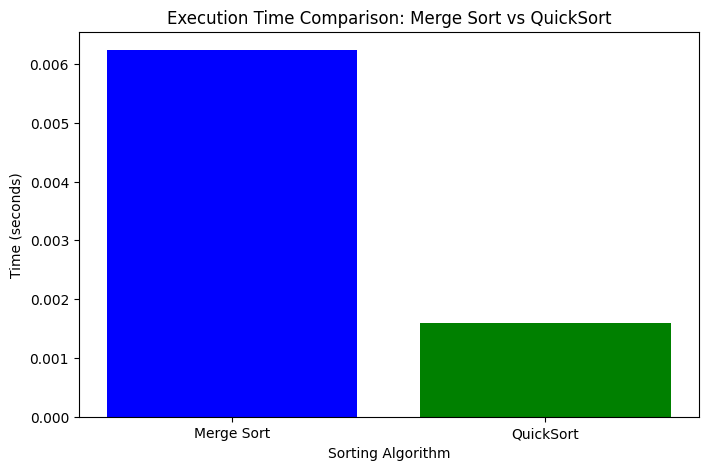

In [87]:
import matplotlib.pyplot as plt

# Sorting algorithm names
algorithms = ['Merge Sort', 'QuickSort']

# Execution times for each algorithm
times = [0.006235837936401367, 0.0015950202941894531]

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(algorithms, times, color=['blue', 'green'])
plt.xlabel('Sorting Algorithm')
plt.ylabel('Time (seconds)')
plt.title('Execution Time Comparison: Merge Sort vs QuickSort')
plt.show()


###**INTERPRETATION**
The code provided implements and measures the execution time of two sorting algorithms, Merge Sort and QuickSort, applied to the Demand column in the dataset. The results show that Merge Sort took approximately 0.0062 seconds and QuickSort took around 0.0016 seconds to sort the same data.

QuickSort was significantly faster than Merge Sort for this particular column. This suggests that for the size and nature of the data in the 'Demand' column, QuickSort is more efficient.

##**2. DIVIDE AND CONQUER**

In [59]:
# Divide and Conquer
import pandas as pd
import matplotlib.pyplot as plt

def divide_and_conquer(data, column):

    if len(data) == 1:
        return data[column].iloc[0]

    mid = len(data) // 2
    left_avg = divide_and_conquer(data.iloc[:mid], column)
    right_avg = divide_and_conquer(data.iloc[mid:], column)

    return (left_avg + right_avg) / 2

data = df
column_to_analyze = 'TripDuration'
average_value = divide_and_conquer(data, column_to_analyze)

print(f'Average {column_to_analyze}: {average_value}')



Average TripDuration: 63.953125


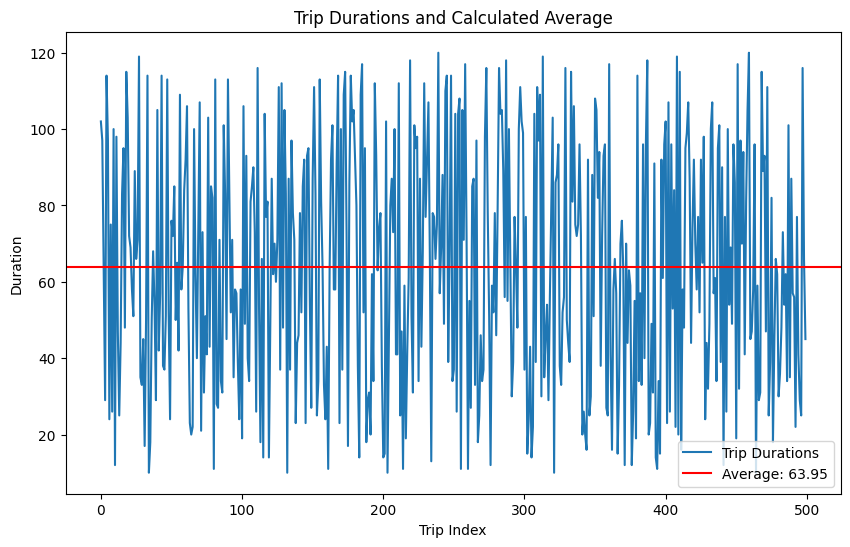

In [88]:
# Column to analyze
column_to_analyze = 'TripDuration'
average_value = divide_and_conquer(df, column_to_analyze)

# Plotting the values and the calculated average
plt.figure(figsize=(10, 6))
plt.plot(df[column_to_analyze], label='Trip Durations')
plt.axhline(y=average_value, color='r', linestyle='-', label=f'Average: {average_value:.2f}')
plt.xlabel('Trip Index')
plt.ylabel('Duration')
plt.title('Trip Durations and Calculated Average')
plt.legend()
plt.show()

##**3. THE NEAREST NEIGHBOUR HEURISTIC GREEDY ALGORITHM**

In [61]:
from geopy.distance import great_circle

# Function to convert location string to a tuple of floats
def parse_location(location_str):
      # Split the string into latitude and longitude, then convert them to float
    lat_str, lon_str = location_str.split(', ')
    return (float(lat_str), float(lon_str))

# Apply the function to the StartLocation and EndLocation columns
df['StartLocation'] = df['StartLocation'].apply(parse_location)
df['EndLocation'] = df['EndLocation'].apply(parse_location)

# Define a starting point for the vehicle, for example, the first StartLocation
current_location = df['StartLocation'][0]

# Function to calculate distance between two points
def calculate_distance(start, end):
    return great_circle(start, end).miles

# Implement the greedy algorithm to assign the nearest customer
assigned_customers = []  # List to keep track of assigned customers
unassigned_customers = df.index.tolist()  # List of all customers

while unassigned_customers:
    # Calculate the distance to all unassigned customers
    distances = df.loc[unassigned_customers, 'EndLocation'].apply(lambda x: calculate_distance(current_location, x))
    # Find the nearest customer
    nearest_customer_idx = distances.idxmin()
    # Add the nearest customer to the assigned list
    assigned_customers.append(nearest_customer_idx)
    # Remove the nearest customer from the unassigned list
    unassigned_customers.remove(nearest_customer_idx)
    # Update the current location to the nearest customer's location
    current_location = df.loc[nearest_customer_idx, 'EndLocation']

# Output the order of assigned customers
assigned_customers_order = df.loc[assigned_customers, 'CustomerID'].tolist()
assigned_customers_order


['1X9TCM',
 'X0I28C',
 '4IUOGR',
 'G1NTRA',
 'XO0T1C',
 'WA81DS',
 'PRY05Z',
 'P7CWVS',
 '16SYQ4',
 'VPQB90',
 '8178ZW',
 'XXWMKG',
 '45EQCG',
 'I4A30X',
 '1XP10Y',
 'J496WL',
 'A83L39',
 '46CTYJ',
 'JB8OXC',
 '8CSI2C',
 '330AWB',
 'P1OGW0',
 'IRF17Z',
 'Y69WZI',
 'CGTPAP',
 '1JAXOW',
 'LXC1CD',
 'NRS4L1',
 'WYXV6I',
 '738XE2',
 'KGLTF3',
 'P9G4LR',
 '7GPSUS',
 '70YUPV',
 'DQ6CXD',
 'BIP2BA',
 'BJEPGD',
 'A33BGW',
 'YKYWGX',
 'EYVFUX',
 '87CXZA',
 'IHVN1A',
 'CYUJMO',
 'YACT22',
 'LIX84Y',
 'S2ISV9',
 'IMOSAX',
 '8IITN0',
 'YNTQZP',
 'ND3MXJ',
 '6XDEK7',
 'XMRBHW',
 'AUV59N',
 '9NO2T9',
 '5EO72S',
 'RLFLL3',
 'RFHL32',
 'AF9LYT',
 'AEFVDW',
 '0NVFPN',
 'IQ3V77',
 'QVBL43',
 '71FQCQ',
 '0GKOZE',
 'YYYBVJ',
 '4DAWCF',
 '04NC84',
 '8A52YI',
 '76UAGQ',
 'XQQ49K',
 '99CA8A',
 'E4ZS1V',
 'F8DKPF',
 'W2J42L',
 'CBWMMM',
 'D7PTEG',
 '02SI33',
 'ILORGL',
 'WC3O9Y',
 '4M833W',
 'ZZZAEO',
 'ULFQCT',
 'GSA7LP',
 'FU9UXZ',
 'BQA6GQ',
 '6K2AXF',
 'JCRFC2',
 'U9K8J6',
 'P3THQV',
 'A6LR2V',
 '57CT9T',

In [62]:
import folium

# Function to create a folium map with the vehicle, customer locations and end location
def create_map_with_end(assignments, df):
    # Start with the first location as the center of the map
    start_lat, start_lon = df['StartLocation'].iloc[0]
    folium_map = folium.Map(location=[start_lat, start_lon], zoom_start=12)

    # Plot the starting location
    folium.Marker(
        location=[start_lat, start_lon],
        icon=folium.Icon(color='green', icon='info-sign'),
        tooltip='Starting Point'
    ).add_to(folium_map)

    # Initialize previous location with the starting point
    prev_location = (start_lat, start_lon)

    # Plot the customer locations and draw lines between them
    for idx in assignments:
        customer_location = df['EndLocation'].iloc[idx]
        folium.Marker(
            location=customer_location,
            icon=folium.Icon(color='blue', icon='flag'),
            tooltip=f'Customer {df["CustomerID"].iloc[idx]}'
        ).add_to(folium_map)

        # Draw a line between the previous location and the customer's location
        folium.PolyLine(locations=[prev_location, customer_location], color='blue').add_to(folium_map)

        # Update the previous location to the customer's location for the next iteration
        prev_location = customer_location

    # Plot the final end location with red color
    end_lat, end_lon = df['EndLocation'].iloc[assignments[-1]]
    folium.Marker(
        location=[end_lat, end_lon],
        icon=folium.Icon(color='red', icon='flag'),
        tooltip='Ending Location'
    ).add_to(folium_map)

    return folium_map

# Create the map with the assigned customer locations and the end location
customer_map_with_end = create_map_with_end(assigned_customers, df)

# Display
customer_map_with_end


##**INTERPRETATION**
This algorithm is a greedy heuristic that sequentially selects the nearest unvisited customer to the current location, which is a classic approach in solving the traveling salesman problem when applied to ridesharing data. It aims to minimize the travel distance or time from point to point, creating a path that connects all customers with the shortest possible route that returns to the starting point.

The method's application in the ridesharing data scenario is to optimize drivers' routes so that they pick up and drop off customers in an order that minimizes travel time or distance, thereby improving operational efficiency, reducing fuel consumption, and increasing customer satisfaction through reduced wait times.

##**4. GREEDY ALGORITHM FOR OPTIMIZED RIDE ASSIGNMENT**

In [64]:
df2 = df.copy()

In [74]:
# Add braket to the columns
df2['StartLocation'] = df2['StartLocation'].apply(lambda x: str(x))
df2['EndLocation'] = df2['EndLocation'].apply(lambda x: str(x))

In [75]:
import pandas as pd
import networkx as nx
from geopy.distance import geodesic
import ast
import numpy as np

# Placeholder for optimized assignments
optimized_assignments = []

# Iterate over customers and find the closest available driver
for customer in df2['CustomerID'].unique():
    # Get the customer's pickup location
    customer_location = ast.literal_eval(
        df2[df2['CustomerID'] == customer]['StartLocation'].iloc[0]
    )

    # Placeholder for closest driver and shortest distance initialization
    closest_driver = None
    shortest_distance = float('inf')

    # Iterate over drivers to find the closest one
    for driver in df['DriverID'].unique():
        # Get the current location of the driver (assuming the last dropoff location)
        driver_location = ast.literal_eval(
            df2[df2['DriverID'] == driver]['EndLocation'].iloc[-1]
        )

        # Calculate distance between the customer and this driver using geodesic distance
        distance = geodesic(customer_location, driver_location).miles

        # If this driver is closer, update the closest driver and shortest distance
        if distance < shortest_distance:
            closest_driver = driver
            shortest_distance = distance

    # Add the match to the optimized assignments list
    optimized_assignments.append((customer, closest_driver, shortest_distance))

# Convert the optimized assignments to a DataFrame
assignments_df = pd.DataFrame(optimized_assignments, columns=['CustomerID', 'DriverID', 'Distance'])

# Display  the assignments
print(assignments_df)




    CustomerID DriverID    Distance
0       B1K4KA   TOFUP7  590.535900
1       B56GQR   H104BZ  471.457472
2       G380VG   6BGYV4  123.982049
3       XHIFMR   ASBWXE  308.504987
4       71FQCQ   GQINLS   73.797826
..         ...      ...         ...
495     QRUE1Y   PC2EJC  283.123497
496     0XZ9GG   7MGEZT  356.276095
497     8L6KWO   T181JH   50.758768
498     MTRV3T   FC6S4I  216.879853
499     E2FM4O   7YWA04   67.904628

[500 rows x 3 columns]


In [77]:

# Create a base map using the first customer's location
first_customer_id = optimized_assignments[0][0]  # Get the first customer ID from the assignments
first_customer_location = ast.literal_eval(
    df2[df2['CustomerID'] == first_customer_id]['StartLocation'].iloc[0]
)
m = folium.Map(location=first_customer_location, zoom_start=12)

# Visualize each customer and their assigned driver
for assignment in optimized_assignments:
    customer_id = assignment[0]
    driver_id = assignment[1]
    customer_location = ast.literal_eval(
        df2[df2['CustomerID'] == customer_id]['StartLocation'].iloc[0]
    )
    driver_location = ast.literal_eval(
        df2[df2['DriverID'] == driver_id]['EndLocation'].iloc[-1]  # Assuming this as the driver's current location
    )

    # Add markers for customer and driver
    folium.Marker(
        customer_location,
        popup=f'Customer {customer_id}',
        icon=folium.Icon(color='green')
    ).add_to(m)

    folium.Marker(
        driver_location,
        popup=f'Driver {driver_id}',
        icon=folium.Icon(color='blue')
    ).add_to(m)

    # Optionally, draw a line between customer and driver
    folium.PolyLine([customer_location, driver_location], color='red').add_to(m)

# Save the map to an HTML file
m.save('optimized_assignments_map.html')

# Display the map
m


##**INTERPRETATION**
The Greedy algorithm, as outlined in the provided code above, iterates over each customer and assigns the closest available driver. For each customer, the algorithm calculates the distance to all available drivers and selects the one with the shortest distance. This process is repeated for all customers, thus creating a series of driver-customer pairs that represent the optimized assignments based on proximity.

The image show a map with various points and lines connecting them, indicating an optimized assignment Greedy algorithm in this ridesharing context. This algorithm strives to make locally optimal choices at each step with the goal of finding the global optimum for matching drivers with customers.


##**5. TRAVELSALES MAN PROBLEM**

In [42]:
from geopy.distance import great_circle
import numpy as np
from itertools import permutations

# Function to calculate distance matrix
def calculate_distance_matrix(locations):
    n = len(locations)
    distance_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            if i != j:
                distance_matrix[i][j] = great_circle(locations[i], locations[j]).kilometers
    return distance_matrix

# Extracting Start and End Locations
start_locations = df['StartLocation'].str.split(',', expand=True).astype(float)
end_locations = df['EndLocation'].str.split(',', expand=True).astype(float)

# Combining locations into a single set to calculate distances between them
all_locations = pd.concat([start_locations, end_locations]).drop_duplicates().values.tolist()

# Calculating the distance matrix
distance_matrix = calculate_distance_matrix(all_locations)

# Since TSP is an NP-hard problem, solving it optimally for large datasets is computationally intensive.
# For simplicity, we'll use a basic approach (nearest neighbor) for a smaller subset of the locations.

# Selecting a smaller subset due to computational constraints
subset_size = 20
subset_locations = all_locations[:subset_size]
subset_distance_matrix = calculate_distance_matrix(subset_locations)

# Nearest Neighbor Algorithm for TSP
def nearest_neighbor_tsp(distance_matrix):
    n = len(distance_matrix)
    visited = [False] * n
    tour = [0]
    visited[0] = True

    for _ in range(1, n):
        last = tour[-1]
        next_city = np.argmin([distance_matrix[last][j] if not visited[j] else float('inf') for j in range(n)])
        tour.append(next_city)
        visited[next_city] = True

    return tour

# Calculating TSP route for the subset
tsp_route = nearest_neighbor_tsp(subset_distance_matrix)
tsp_route_locations = [subset_locations[i] for i in tsp_route]

tsp_route_locations


[[1.255784, 79.982622],
 [-7.225482, 127.915358],
 [26.643715, 170.97119],
 [35.961145, -174.196017],
 [42.478782, -137.439422],
 [33.770593, -101.305352],
 [51.901785, -67.117126],
 [77.580152, -10.630373],
 [83.842236, 77.899497],
 [72.383572, -132.208995],
 [58.837257, 136.654088],
 [55.838284, 92.277476],
 [-70.932464, 90.443501],
 [-74.214114, 139.361876],
 [-84.716557, -123.040471],
 [-65.14181, -119.629184],
 [-52.549709, -69.406686],
 [-53.939791, -65.396011],
 [-35.920326, -88.449085],
 [-47.116652, -9.247167]]

<ipython-input-43-58f263b4a82b>:12: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


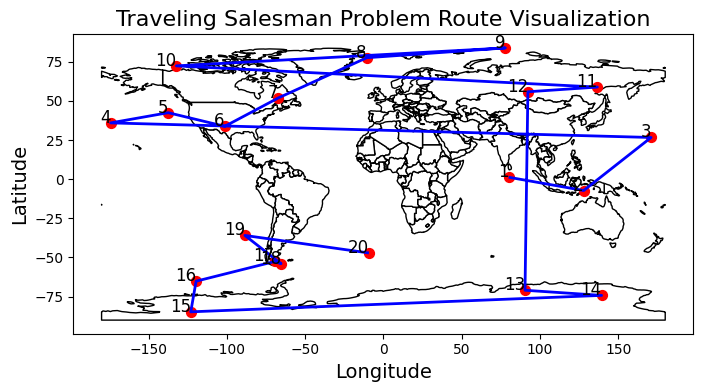

In [43]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, LineString

# Convert the TSP route locations to GeoDataFrame for plotting
gdf = gpd.GeoDataFrame({'geometry': [Point(lon, lat) for lat, lon in tsp_route_locations]}, crs="EPSG:4326")

# Create a GeoDataFrame for the route lines
route_line = gpd.GeoDataFrame({'geometry': [LineString(gdf['geometry'].tolist())]}, crs=gdf.crs)

# Load a world map for context
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plotting
fig, ax = plt.subplots(figsize=(8, 5))
world.plot(ax=ax, color='white', edgecolor='black')

# Plot the points
gdf.plot(ax=ax, color='red', marker='o', markersize=50)

# Plot the route
route_line.plot(ax=ax, color='blue', linewidth=2)

# Add annotations for each point
for idx, point in enumerate(gdf.geometry):
    ax.text(point.x, point.y, f'{idx+1}', fontsize=12, ha='right')

# Set title and labels
ax.set_title('Traveling Salesman Problem Route Visualization', fontsize=16)
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)

plt.show()


##**INTERPRETATION**

In the context of ridesharing, solving the TSP can optimize routes for drivers to pick up and drop off passengers. The provided code outlines a method for calculating a distance matrix between locations and applying a nearest neighbor heuristic to approximate a solution to the TSP. The nearest neighbor approach starts from a starting location, then visits the next nearest unvisited location until all locations have been visited, which is computationally less intensive and provides a quick, although not always optimal, solution.

The visualization illustrates a route visualization of the Traveling Salesman Problem (TSP), where the objective is to find the shortest possible route that visits a set of locations once and returns to the origin point. The red dots represent different locations (cities or customer/destination points in ridesharing), and the blue lines indicate the path taken to visit all locations in a loop.

##**6. LINEAR REGRESSION**

In [5]:
df3 = df.copy()

In [32]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Selecting the target variable and features
target = 'Demand'
features = ['AverageWaitTime', 'PickupLocation', 'DropoffLocation', 'TripDuration', 'TimeOfDay', 'WeatherCondition', 'DayOfWeek', 'TrafficCondition']

# Preparing the data
X = df3[features]
y = df3[target]

# Handling categorical variables with one-hot encoding
categorical_features = ['TimeOfDay', 'WeatherCondition', 'DayOfWeek', 'TrafficCondition']
one_hot_encoder = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', one_hot_encoder, categorical_features)
    ], remainder='passthrough')

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creating a pipeline that first one-hot encodes the categorical variables, then applies Linear Regression
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])

# Fitting the model
pipeline.fit(X_train, y_train)

# Predicting on test data
y_pred = pipeline.predict(X_test)

# Calculating the performance metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

rmse, mae, r2



(15.239670610168828, 13.303792315896647, 0.05277569082256006)

In [21]:
# Checking for overfitting by comparing the training and testing scores
train_score = pipeline.score(X_train, y_train)
test_score = pipeline.score(X_test, y_test)

train_score, test_score

(0.06797963839218069, 0.055280218898517974)

##**INTERPRETATION**


This regression analysis aims to predict the 'Demand' for ridesharing services based on various features such as 'AverageWaitTime', 'PickupLocation', 'DropoffLocation', 'TripDuration', 'TimeOfDay', 'WeatherCondition', 'DayOfWeek', and 'TrafficCondition'. Categorical variables are handled via one-hot encoding to convert them into a format suitable for regression analysis. The model used is a Linear Regression, integrated into a pipeline that preprocesses the data before fitting.

The Root Mean Square Error (RMSE) of approximately 15.24 suggests that the model's predictions are, on average, about 15 units away from the actual demand values. The Mean Absolute Error (MAE) of roughly 13.30 provides an indication of the absolute discrepancies between the predicted and actual values. The R-squared (R²) value of approximately 0.053 is quite low, indicating that the model explains only about 5.3% of the variance in demand, suggesting that the model is not very effective at predicting the actual demand.

The loss function, in this context, is the metric used to evaluate the model's performance. It quantifies the difference between the predicted values and the actual values, with the goal of minimizing this difference during training. The RMSE and MAE are types of loss functions; RMSE gives a higher weight to larger errors by squaring the differences before averaging, which can be useful if large errors are particularly undesirable. In contrast, MAE provides a straightforward average of absolute differences. In ridesharing data analysis, a well-tuned loss function can help optimize demand predictions, which is crucial for balancing supply and demand, pricing strategies, and resource allocation.

The comparison of the training score (approximately 0.068) and the testing score (approximately 0.055) for the Linear Regression model suggests that there is not a significant difference between how the model performs on the training data versus the testing data. This indicates that overfitting is likely not a problem for this model, as overfitting would be characterized by a high training score and a low testing score. However, the scores themselves are quite low, which means that the model does not explain much of the variance in the data, either for the training or testing set.